In [1]:
import mySDC
import numpy as np
from matplotlib import pyplot as plt

#### Benchmarking on a sample Dahlquist problem

In [2]:
t0, u0 = 0.0, 1.0 + 0.j

steps = 101 # t=0. -> t=1.
timestep = 0.01
t = np.linspace(t0, t0 + (steps-1) * timestep, steps)

u = np.zeros((steps), dtype=np.cfloat)
uv = np.zeros((steps), dtype=np.cfloat)

##### EulerSDC

/opt/homebrew/lib/python3.10/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


1...
2...
3...
4...


/opt/homebrew/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


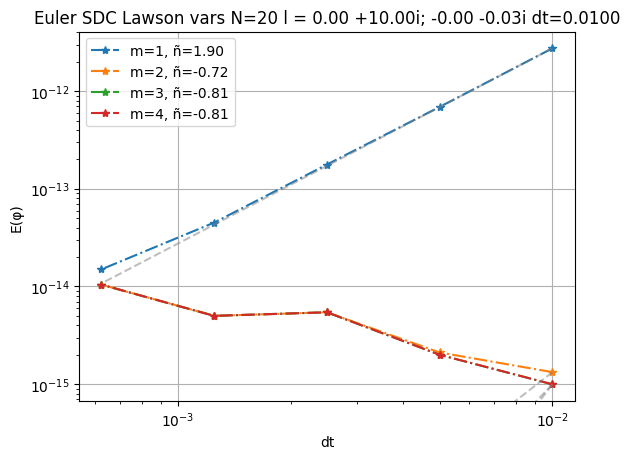

In [3]:
# with Lawson reformulation
l1, l2 = 0. + 10.j, -0.03j
uv0 = u0 * np.exp(-t0 * l1)

N, M, folds = 20, 5, 5
fv = lambda t, x : x * l2

errors = np.zeros((M, folds), dtype="complex128")
slopes = np.zeros((M), dtype="complex128")

for m in range(1, M):
    # errors in Lawson vars
    errors[m], tau = mySDC.benchmark(mySDC.Euler_SDC, (N, m, t, uv0, [fv]), lambda tt: np.exp(l2 * tt), folds, False)
    # error on u(t)
    errors[m] *= np.exp(tau * l1)
    # calculate slope
    slopes[m], _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    print('%d...' % m)

# plot slopes
title = 'Euler SDC Lawson vars N=%d l = %.2f %+.2fi; %.2f %+.2fi dt=%.4f' % (N, l1.real, l1.imag, l2.real, l2.imag, timestep)
mySDC.plot_slopes(title, errors, slopes, N, M, folds, tau, './images_dahlquist/EulerSDCLawson_N=%d_M=%d' % (N, M))

1...
2...
3...
4...


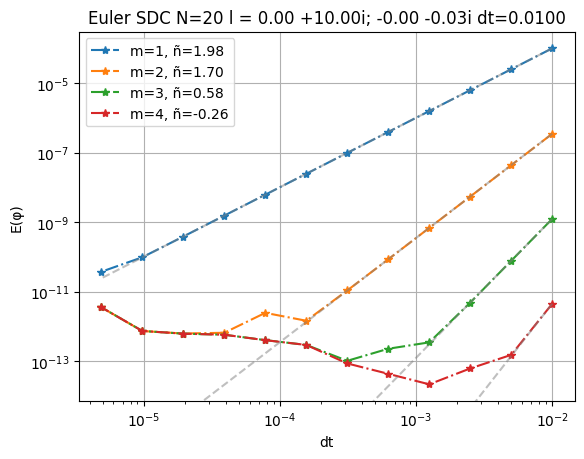

In [4]:
# direct Euler SDC
l1, l2 = 0. + 10.j, -0.03j

N, M, folds = 20, 5, 12
fu = lambda t, x : x * (l1 + l2)

errors = np.zeros((M, folds), dtype="complex128")
slopes = np.zeros((M), dtype="complex128")

for m in range(1, M):
    errors[m], tau = mySDC.benchmark(mySDC.Euler_SDC, (N, m, t, uv0, [fu]), lambda tt: np.exp((l2 + l1) * tt), folds, False)
    # plot slopes
    slopes[m], _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    print('%d...' % m)
    
# plot slopes
title = 'Euler SDC N=%d l = %.2f %+.2fi; %.2f %+.2fi dt=%.4f' % (N, l1.real, l1.imag, l2.real, l2.imag, timestep)
mySDC.plot_slopes(title, errors, slopes, N, M, folds, tau, './images_dahlquist/EulerSDC_N=%d_M=%d' % (N, M))

##### IMEXSDC

1...
2...
3...
4...
5...
6...


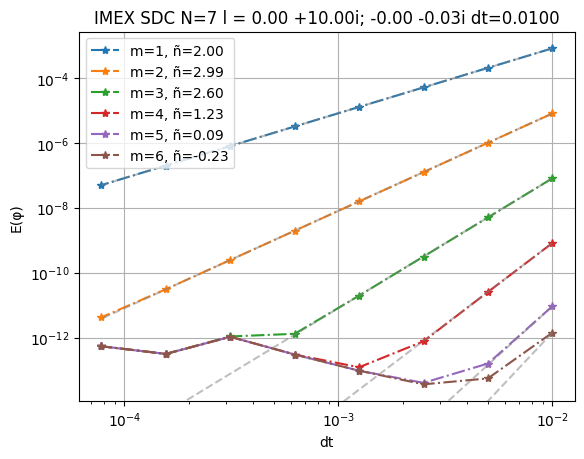

In [5]:
l1, l2 = 0. + 10.j, -0.03j
N, M, folds = 7, 7, 8
fn = lambda x : x * l2

errors = np.zeros((M, folds), dtype="complex128")
slopes = np.zeros((M), dtype="complex128")

for m in range(1, M):
    errors[m], tau = mySDC.benchmark(mySDC.IMEXSDC, (N, m, t, u0, [l1, fn]), lambda tt: np.exp((l1 + l2) * tt), folds, False)
    # plot slopes
    slopes[m], _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    print('%d...' % m)
    
# plot slopes
title = 'IMEX SDC N=%d l = %.2f %+.2fi; %.2f %+.2fi dt=%.4f' % (N, l1.real, l1.imag, l2.real, l2.imag, timestep)
mySDC.plot_slopes(title, errors, slopes, N, M, folds, tau, './images_dahlquist/IMEXSDC_N=%d_M=%d' % (N, M))

1...
2...
3...
4...
5...
6...


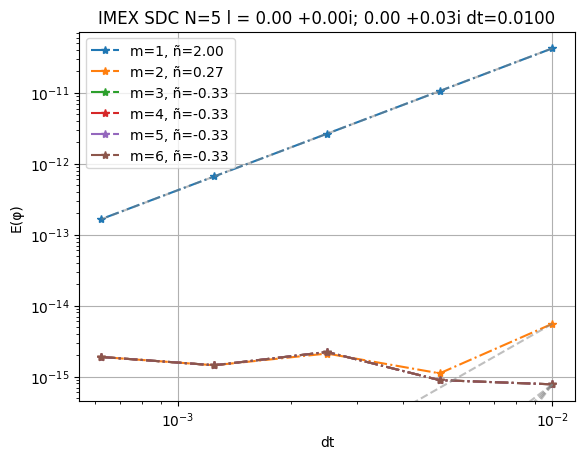

In [6]:
# only explicit
l1, l2 = 0. + 0.j, 0.03j
N, M, folds = 5, 7, 5
fn = lambda x : x * l2

errors = np.zeros((M, folds), dtype="complex128")
slopes = np.zeros((M), dtype="complex128")

for m in range(1, M):
    errors[m], tau = mySDC.benchmark(mySDC.IMEXSDC, (N, m, t, u0, [l1, fn]), lambda tt: np.exp((l1 + l2) * tt), folds, False)
    # plot slopes
    slopes[m], _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    print('%d...' % m)
    
# plot slopes
title = 'IMEX SDC N=%d l = %.2f %+.2fi; %.2f %+.2fi dt=%.4f' % (N, l1.real, l1.imag, l2.real, l2.imag, timestep)
mySDC.plot_slopes(title, errors, slopes, N, M, folds, tau, './images_dahlquist/IMEXSDC_only_nonlin_N=%d_M=%d' % (N, M))

1...
2...
3...
4...


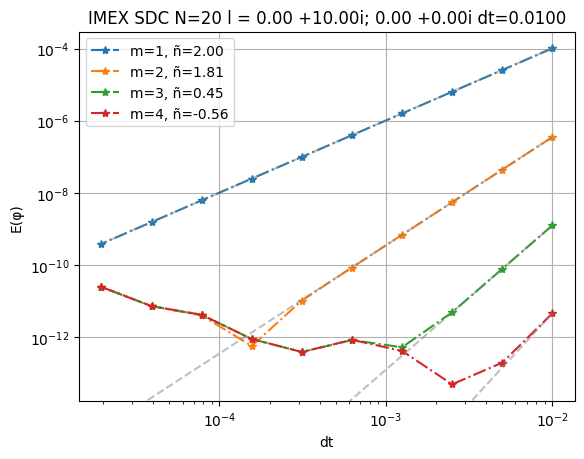

In [7]:
# only implicit
l1, l2 = 0. + 10.j, 0.j
N, M, folds = 20, 5, 10
fn = lambda x : x * l2

errors = np.zeros((M, folds), dtype="complex128")
slopes = np.zeros((M), dtype="complex128")

for m in range(1, M):
    errors[m], tau = mySDC.benchmark(mySDC.IMEXSDC, (N, m, t, u0, [l1, fn]), lambda tt: np.exp((l1 + l2) * tt), folds, False)
    # plot slopes
    slopes[m], _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    print('%d...' % m)
    
# plot slopes
title = 'IMEX SDC N=%d l = %.2f %+.2fi; %.2f %+.2fi dt=%.4f' % (N, l1.real, l1.imag, l2.real, l2.imag, timestep)
mySDC.plot_slopes(title, errors, slopes, N, M, folds, tau, './images_dahlquist/IMEXSDC_only_lin_N=%d_M=%d' % (N, M))

##### ETDSDC

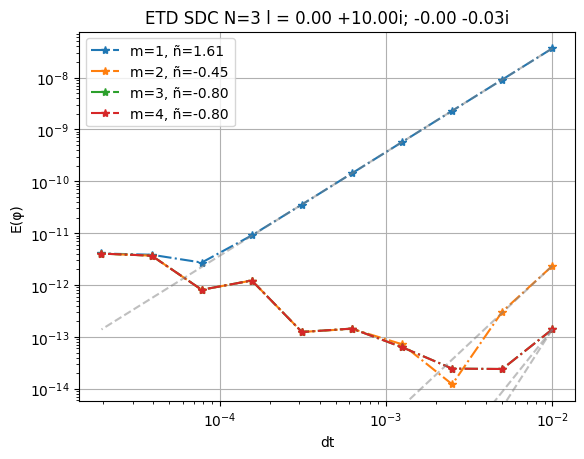

In [8]:
t0, u0 = 0.0, 1.0 + 0.j

steps = 101 # t=0. -> t=1.
timestep = 0.01
t = np.linspace(t0, t0 + (steps-1) * timestep, steps)

l1, l2 = 0. + 10.j, -0.03j
N, M, folds = 3, 5, 10
fn = lambda x : x * l2

errors = np.zeros((M, folds), dtype="complex128")
slopes = np.zeros((M), dtype="complex128")

for m in range(1, M):
    errors[m], tau = mySDC.benchmark(mySDC.ETDSDC, (N, m, t, u0, [l1, fn]), lambda tt: np.exp((l1 + l2) * tt), folds, False)
    # plot slopes
    slopes[m], _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    
# plot slopes
title = 'ETD SDC N=%d l = %.2f %+.2fi; %.2f %+.2fi' % (N, l1.real, l1.imag, l2.real, l2.imag)
mySDC.plot_slopes(title, errors, slopes, N, M, folds, tau, './images_dahlquist/ETDSDC_N=%d_M=%d' % (N, M))

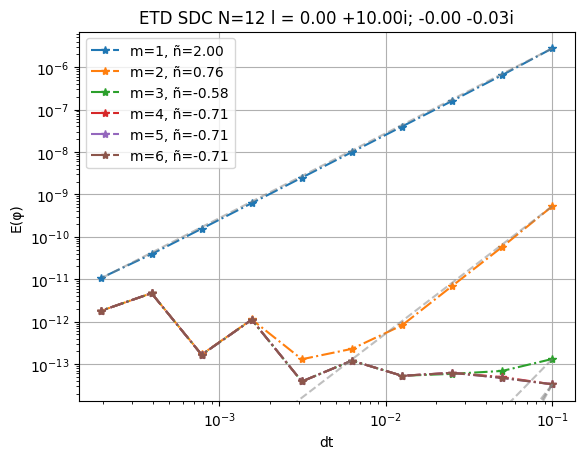

In [9]:
t0, u0 = 0.0, 1.0 + 0.j

steps = 101 # t=0. -> t=1.
timestep = 0.1
t = np.linspace(t0, t0 + (steps-1) * timestep, steps)

l1, l2 = 0. + 10.j, -0.03j
N, M, folds = 12, 7, 10
fn = lambda x : x * l2

errors = np.zeros((M, folds), dtype="complex128")
slopes = np.zeros((M), dtype="complex128")

for m in range(1, M):
    errors[m], tau = mySDC.benchmark(mySDC.ETDSDC, (N, m, t, u0, [l1, fn]), lambda tt: np.exp((l1 + l2) * tt), folds, False)
    # plot slopes
    slopes[m], _ = np.polyfit(np.log10(tau), np.log10(errors[m]), 1)
    
# plot slopes
title = 'ETD SDC N=%d l = %.2f %+.2fi; %.2f %+.2fi' % (N, l1.real, l1.imag, l2.real, l2.imag)
mySDC.plot_slopes(title, errors, slopes, N, M, folds, tau, './images_dahlquist/ETDSDC_N=%d_M=%d' % (N, M))